# 🛒 Walmart Retail Analysis - Kaggle Dataset

Completed by: Christine Tang
Dataset source: https://www.kaggle.com/datasets/yasserh/walmart-dataset

In [9]:
# Import statements:

# For Data Analysis, EDA:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from tabulate import tabulate
import statsmodels.api as sm
from scipy.stats import boxcox, norm, probplot
from scipy.stats.mstats import winsorize
from scipy.special import inv_boxcox

# # Secret API Key
# import os
# # from dotenv import load_dotenv

# Models
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, precision_recall_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor

# External Libraries
import xgboost as xgb
import lightgbm as lgb
import shap

# NLP:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import re

# Unverified SSL to allow importing dataset from Github:
import ssl

# ssl._create_default_https_context = ssl._create_unverified_context

In [11]:
# Read in to Pandas csv:
df = pd.read_csv('https://raw.githubusercontent.com/TangoMango223/walmart_analysis/master/Walmart.csv')

# Exploratory Data Analysis (EDA)

In [12]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [13]:
# We don't appear to have any missing data which is good.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
# Let's conduct univariate analysis...
# Our goal is to predict weekly sales...

In [16]:
# Check if stores is unique - it's not
df["Store"].is_unique

False

In [26]:
# Divide between numerical and categorical variables.
numerical_cols = df.select_dtypes(include = 'number');

In [27]:
# The only one not number is date-time, which we will deal with later.

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,718125.53,0,56.47,3.969,192.330854,8.667


In [28]:
# Look at the stores...

def numerical_var(df, col):
    # Function to quickly look into the numerical variables
    sns.boxplot(data = df, x = col)
    plt.title(f"Boxplot of {col}")
    plt.show()
    
    # Look at histogram as well:
    sns.histplot(data = df, x = col)
    plt.title(f"Histogram of {col}")
    plt.show()
    

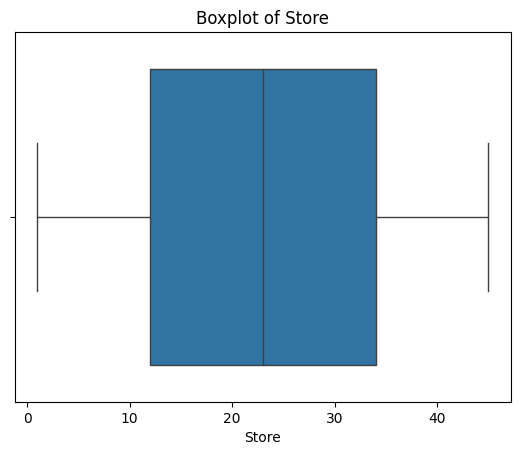

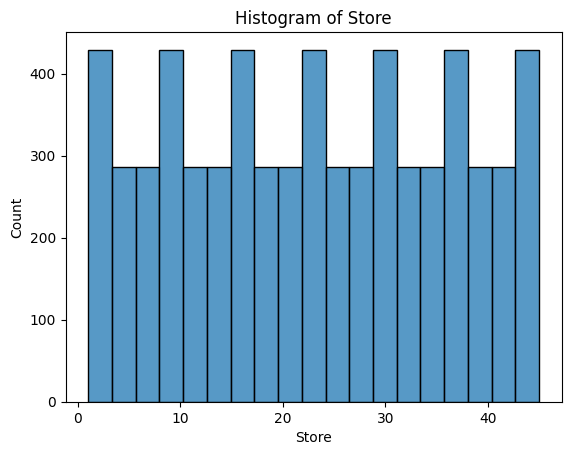

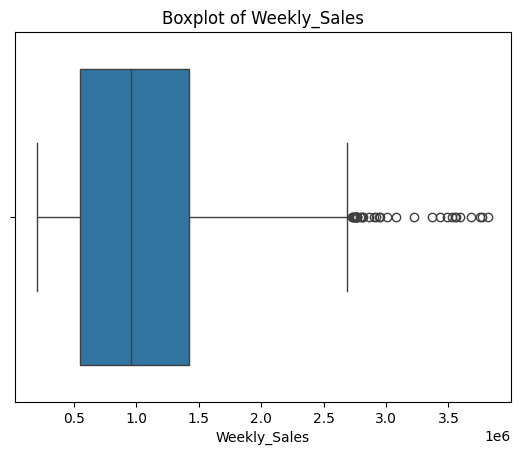

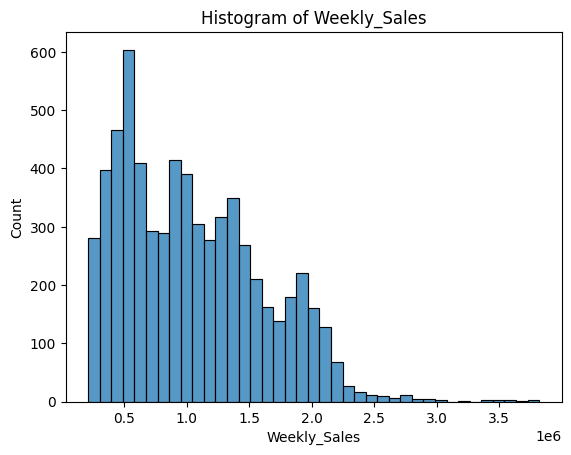

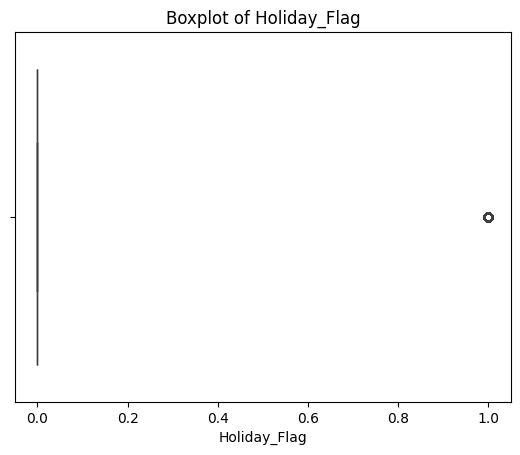

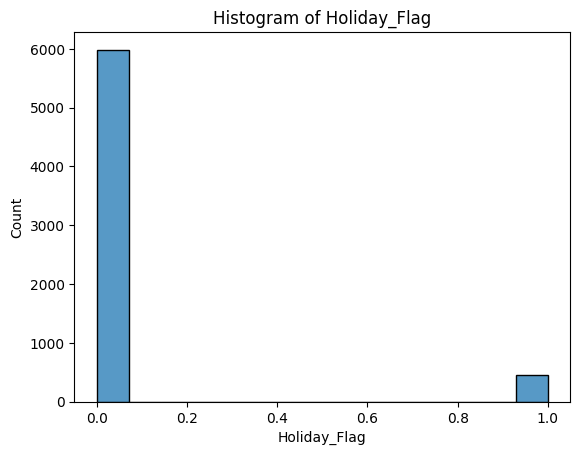

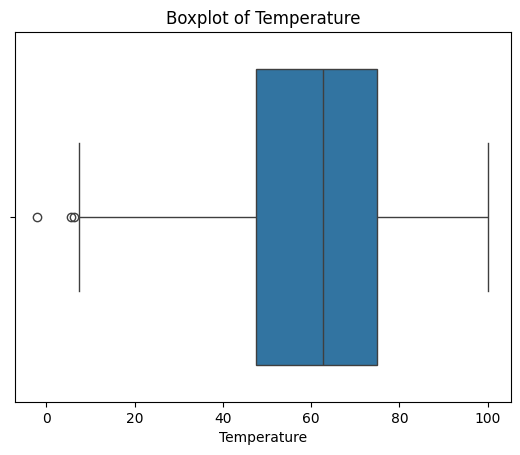

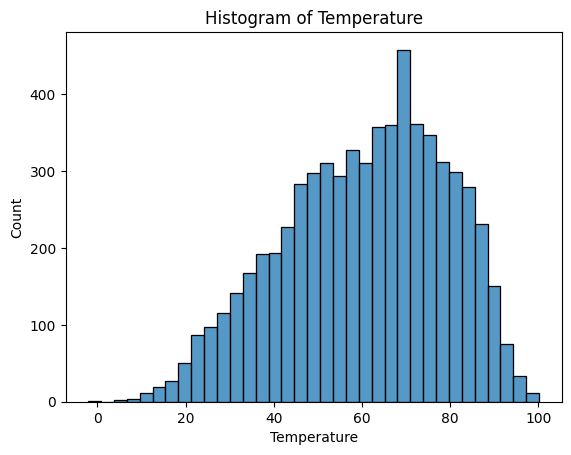

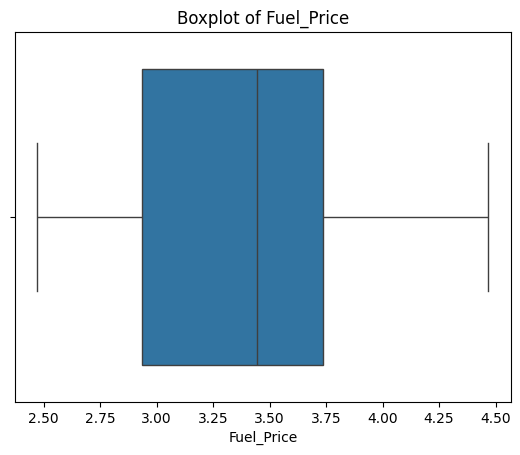

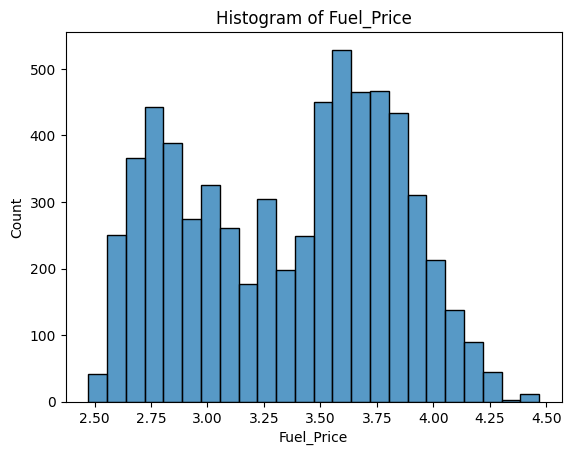

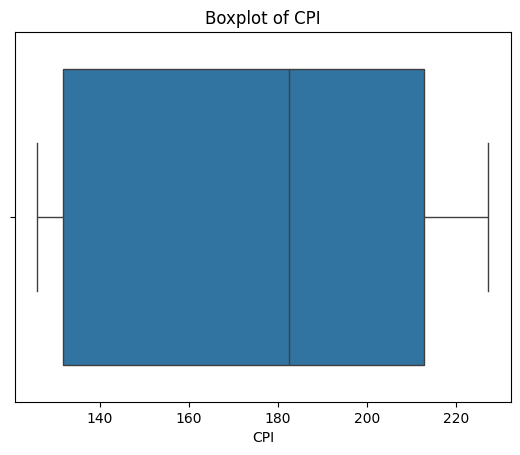

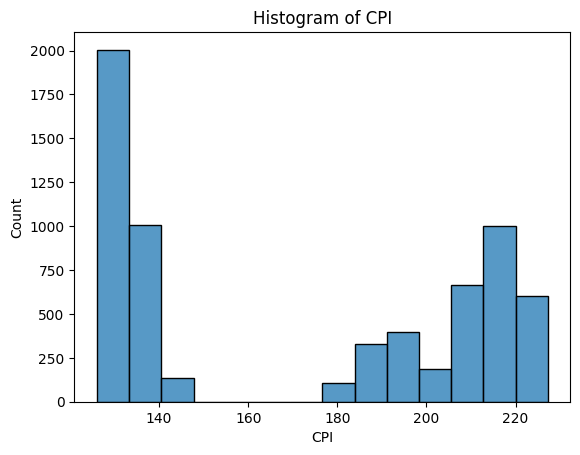

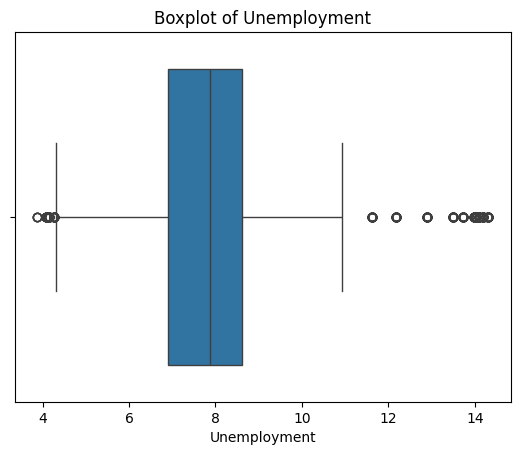

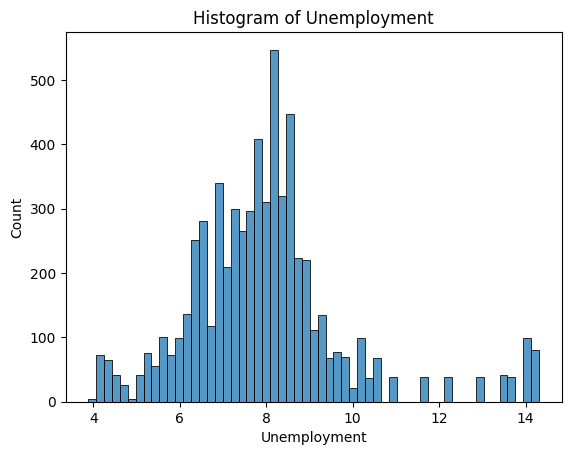

In [29]:
# Loop thru and create graphs:
for col in numerical_cols:
    numerical_var(df, col)

In [36]:
# Before we clean and feature-engineer with dates, let's understand the range...
df["Date"].value_counts(sort= "ascending")

# From a quick check, we see it ranges from 2010 to 2012 for data. Good to know.

Date
05-02-2010    45
23-12-2011    45
11-11-2011    45
18-11-2011    45
25-11-2011    45
              ..
07-01-2011    45
14-01-2011    45
21-01-2011    45
28-01-2011    45
26-10-2012    45
Name: count, Length: 143, dtype: int64